In [19]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from scipy.optimize import curve_fit
from lib import histfit

In [21]:
def get_means_stds(names):
    times = {} 
    diffs = {}
    means = {}
    stds = {}
    N_tot = {}

    for name in names:
        diffs[name] = []
        times[name] = []

        #data_times = open("data/2023-01-16/Time-2023-01-17-"+name+".txt", "r")
        data_times = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-17/Time-2023-01-17-"+name+".txt", "r")
        N_row = 0

        for row in data_times:
            N_row += 1
            row = row.replace("\n", "")
            row = row.replace(",", ".")
            terms = row.split("\t")
            terms = np.sort([float(terms[term]) for term in range(len(terms))])
            #diffs[name] = diffs[name] + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
            
            for i, term in enumerate(terms):
                if term > 1:
                    times[name].append(term)
                    if i < len(terms)-1 and terms[i+1] > 1:
                        diffs[name].append(terms[i+1] - term)

        if len(times[name]) >= 1:
            means[name] = np.mean(times[name])
            stds[name] = np.std(times[name])/np.sqrt(N_row)#/np.sqrt(len(times[name]))
        else:
            means[name] = 0
            stds[name] = 0
        
        #print(N_row)
    
        N_tot[name] = len(times[name])
    
    return times, diffs, means, stds, N_tot

#def fit_function(theta):
#    def fun(x):
#        return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
#    return fun

def fit_function(theta):
   if theta[1] <= 0:
      def fun(x):
         return 0
   else:
      def fun(x):
         return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
   return fun    

def gaussian(x, mean=0, std=1):
    return np.e**(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2)

def line_(x, a, b):
    return a*x + b

[2.75685808e-06 5.25356525e-03]


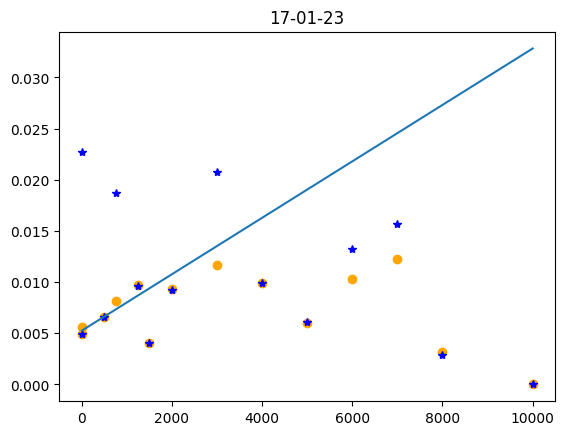

In [36]:
names = ["1", "10", "500", "750", "1250", "1500", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "10000"] 
eval_times = np.array([1, 10, 500, 750, 1250, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 10000])

max_N_row = 0

times, diffs, means, stds, N_tot = get_means_stds(names)
stds_fit = {}
mean_fit = {}

for i, name in enumerate(names):

    bins_range = [8.35,8.55]
    #theta_0 = [8.4, 0.03]
    theta_0 = [np.mean(times[name]), np.std(times[name])]
    n_bins = 50
    min_fit = histfit.hist_fit(times[name], bins_range, n_bins, fit_function, theta_0)
    mean_fit[name] = (min_fit.x[0])
    stds_fit[name] = (min_fit.x[1])
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    plt.plot(eval_times[i], stds_fit[name]/np.sqrt(10), marker="o", c="orange")
    plt.plot(eval_times[i], stds[name], marker="*", c="blue")
stds_fit_ = np.array(list((stds_fit.values())))
result = curve_fit(line_, eval_times[0:3], stds_fit_[0:3]/np.sqrt(10), p0=[1e-7, 5e-3])
print(result[0])
y = line_(np.array(eval_times), result[0][0], result[0][1])

plt.plot(eval_times, y)
plt.plot([], [], marker="o", c="orange", label="fit")
plt.plot([], [], marker="*", c="blue", label="row")
plt.title("17-01-23")
plt.show()

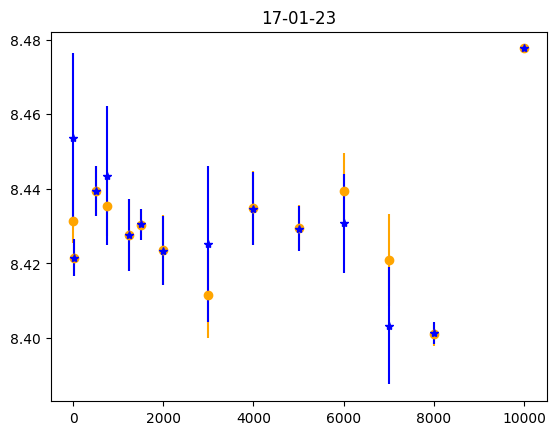

In [29]:
for i, name in enumerate(names):
    plt.errorbar(eval_times[i], mean_fit[name], stds_fit[name]/np.sqrt(10), marker="o", c="orange")
    plt.errorbar(eval_times[i], means[name], stds[name], marker="*", c="blue")
plt.plot([], [], marker="o", c="orange", label="fit")
plt.plot([], [], marker="*", c="blue", label="row")
plt.title("17-01-23")
plt.show()

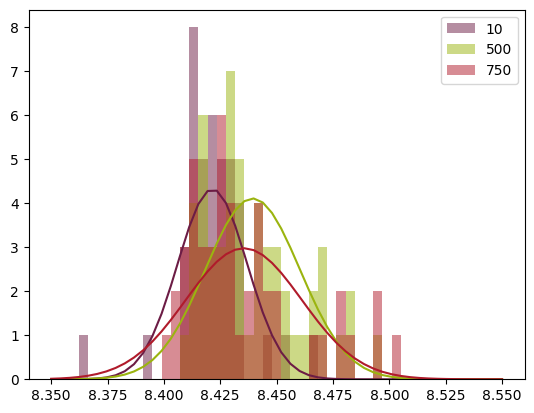

In [18]:
names = ["10","500","750"]
#times, diffs, means, stds = get_means_stds(names)
bins_range = [8.35,8.55]
n_bins = 50
for name in names:
    color = (uniform(0, 1), uniform(0, 1), uniform(0, 1))
    bins=np.linspace(bins_range[0],bins_range[1],n_bins)
    delta_t = bins[1]-bins[0]
    histo = plt.hist(times[name], bins=bins, alpha = 0.5, label = name, color=color)
    x = bins
    y = gaussian(x, mean_fit[name], stds_fit[name])*N_tot[name]*delta_t
    plt.plot(x,y, c=color)
plt.legend()
plt.show()

# 18-01-22

In [7]:
def get_means_stds(names):
    times = {} 
    diffs = {}
    means = {}
    stds = {}

    for name in names:
        diffs[name] = []
        times[name] = []

        #data_times = open("data/2023-01-16/Time-2023-01-18-"+name+".txt", "r")
        data_times = open("/Users/valerio/Documents/lab/Lab-Rydberg/wavw_lec_20-01-23/2023-01-18/Time-2023-01-18-"+name+".txt", "r")
        N_row = 0

        for row in data_times:
            N_row += 1
            row = row.replace("\n", "")
            row = row.replace(",", ".")
            terms = row.split("\t")
            terms = np.sort([float(terms[term]) for term in range(len(terms))])
            #diffs[name] = diffs[name] + [terms[i+1] - terms[i] for i in range(len(terms)-1)]
            
            for i, term in enumerate(terms):
                if term > 1:
                    times[name].append(term)
                    if i < len(terms)-1 and terms[i+1] > 1:
                        diffs[name].append(terms[i+1] - term)
        #print(N_row)
        if len(times[name]) >= 1:
            means[name] = np.mean(times[name])
            stds[name] = np.std(times[name])/np.sqrt(N_row)#/np.sqrt(len(times[name]))
        else:
            means[name] = 0
            stds[name] = 0
    
    N_tot = sum([len(lista_i) for lista_i in list(times.values())])
    print(N_tot)
    
    return times, diffs, means, stds

#def fit_function(theta):
#    def fun(x):
#        return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
#    return fun

def fit_function(theta):
   if theta[1] <= 0:
      def fun(x):
         return 0
   else:
      def fun(x):
         return np.e**(-(x-theta[0])**2/(2*theta[1]**2)) / np.sqrt(2*np.pi*theta[1]**2)
   return fun   

461


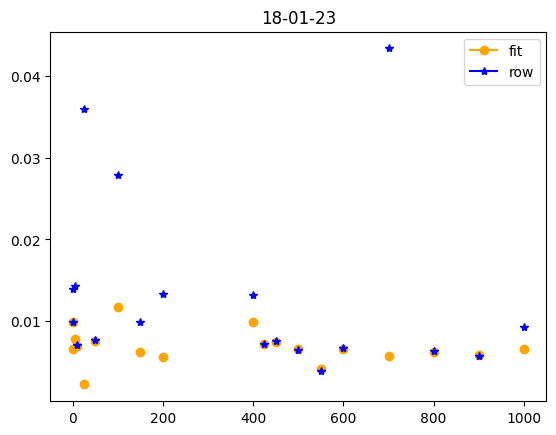

In [8]:
names = ["1_1", "1_2", "1_5", "1_10", "1_25", "1_50", "1_100", "1_150", "1_200", "1_400", "1_425", "1_450", "1_500", "1_550", "1_600", "1_700", "1_800", "1_900", "1_1000"] 
eval_times = [1, 2, 5, 10, 25, 50, 100, 150, 200, 400, 425, 450, 500, 550, 600, 700, 800, 900, 1000]

times, diffs, means, stds = get_means_stds(names)
stds_fit = []
mean_fit = []

for i, name in enumerate(names):

    bins_range = [8.3,8.5]
    #theta_0 = [8.4, 0.03]
    theta_0 = [np.mean(times[name]), np.std(times[name])]
    n_bins = 50
    min_fit = histfit.hist_fit(times[name], bins_range, n_bins, fit_function, theta_0)
    mean_fit.append(min_fit.x[0])
    stds_fit.append(min_fit.x[1])
    #plt.plot(eval_times[i], means[name], marker="o", c="blue")
    #plt.errorbar(eval_times[i], means[name], stds[name], marker="o", c="blue")
    plt.plot(eval_times[i], stds_fit[i]/np.sqrt(10), marker="o", c="orange")
    plt.plot(eval_times[i], stds[name], marker="*", c="blue")
plt.plot([], [], marker="o", c="orange", label="fit")
plt.plot([], [], marker="*", c="blue", label="row")
plt.title("18-01-23")
plt.legend()
plt.show()

33


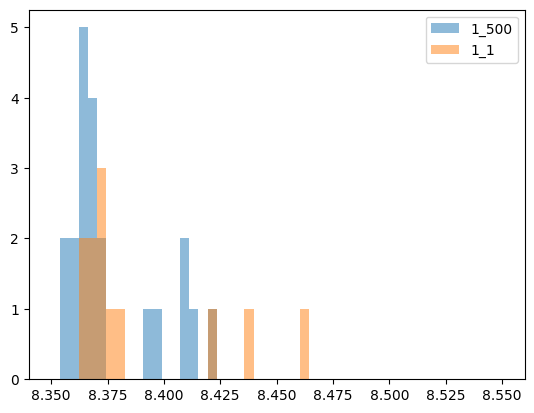

In [9]:
names = ["1_500","1_1"]
times, diffs, means, stds = get_means_stds(names)
bins_range = [8.35,8.55]
n_bins = 50
for name in names:
    plt.hist(times[name], bins=np.linspace(bins_range[0],bins_range[1],n_bins), alpha = 0.5, label = name)
plt.legend()
plt.show()